# 🌡️ 연도별 7월 폭염 데이터 분석 실습

이 노트북은 여러 연도의 7월 폭염 데이터를 바탕으로 **연도별 평균 최고기온의 변화**를 분석하는 실습 예제입니다.

## ✅ 실습 목표
- 폭염 관련 `.csv` 데이터를 연도별로 통합한다.
- `pandas`로 날짜 데이터를 처리하고 연도별로 그룹화한다.
- `matplotlib`을 이용해 시계열 그래프로 시각화한다.

---

## 🔧 Step 1. 라이브러리 불러오기

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


## 📂 Step 2. 데이터 파일 불러오기 및 연도 통합

In [6]:
# 변환된 폭염 CSV 파일 리스트
file_paths = [
    "heatwave_2021_07.csv",
    "heatwave_2022_07.csv",
    "heatwave_2023_07.csv",
    "heatwave_2024_07.csv",
    "heatwave_2025_07.csv"
]

# 연도별 통합 데이터프레임 생성
combined_df = pd.DataFrame()

for path in file_paths:
    df = pd.read_csv(path, encoding="utf-8-sig")
    df.columns = df.columns.str.strip()  # 공백 제거
    if '일시' in df.columns:
        df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
        df['연도'] = df['일시'].dt.year
        combined_df = pd.concat([combined_df, df], ignore_index=True)

combined_df.head() # 5개의 연도별 데이터셋 csv 파일을 통합하여 dataframe 으로 변환 후 앞부분만 출력

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계),연도
0,2021-07-01,북강릉(104),X,28.1,26.4,21.8,18.1,86.8,X,,X,높음,2021
1,2021-07-01,동해(106),X,27.4,25.2,21.9,19.1,90.0,X,,X,매우높음,2021
2,2021-07-01,서울(108),X,31.3,31.0,26.3,21.4,70.9,O,관심,X,매우높음,2021
3,2021-07-01,인천(112),X,29.9,29.3,25.6,21.8,67.9,X,관심,X,매우높음,2021
4,2021-07-01,원주(114),X,31.0,31.3,25.0,19.0,70.0,X,관심,X,높음,2021


## 📊 Step 3. 연도별 평균 최고기온 계산

In [7]:
# 최고기온 열이 존재하는지 확인하고 평균 계산
if '최고기온(°C)' in combined_df.columns:
    grouped = combined_df.groupby('연도')['최고기온(°C)'].mean().reset_index() #연도별 7월 최고기온 열의 평균값 계산
else:
    print("⚠️ '최고기온(°C)' 열이 존재하지 않습니다.")
grouped.head() # 계산된 dataframe의 앞부분만 출력
'''
  출력해보면, 2025년이 제일 덥네요 정말...
'''

'\n  출력해보면, 2025년이 제일 덥네요 정말...\n'

## 📈 Step 4. 시계열 그래프 시각화

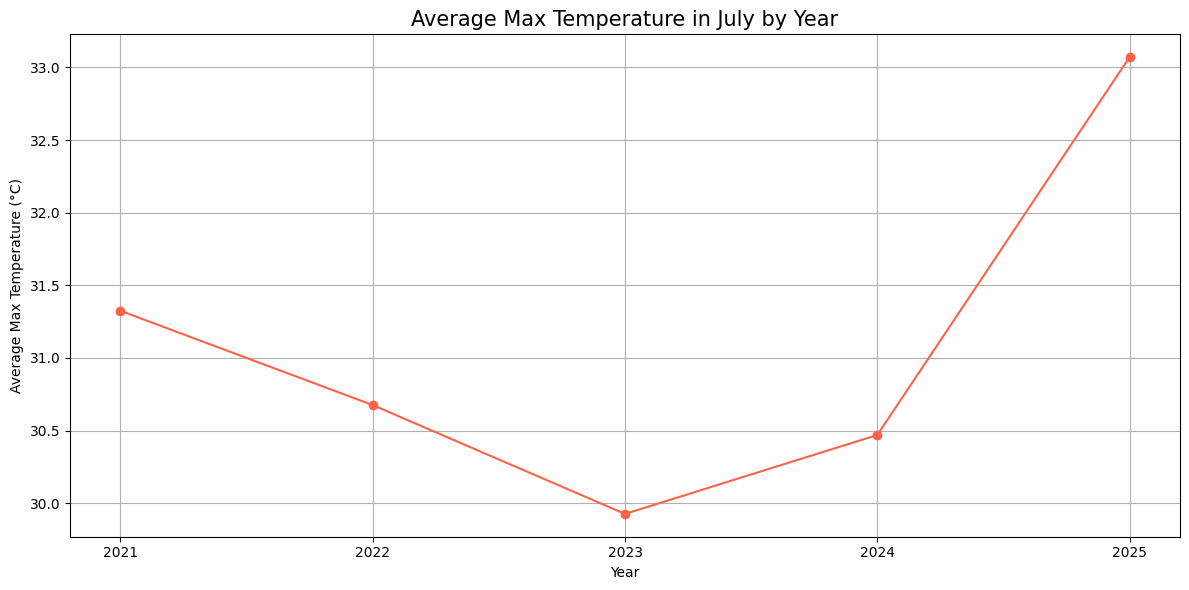

In [8]:
# 연도별 평균 최고기온 시각화 (영문 버전)
plt.figure(figsize=(12, 6))
plt.plot(grouped['연도'], grouped['최고기온(°C)'], marker='o', color='tomato')
plt.title("Average Max Temperature in July by Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Average Max Temperature (°C)")
plt.xticks(range(2021, 2026))
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔍 추가 탐구 과제
- 폭염 여부(`폭염여부(O/X)`)가 'O'인 날의 개수를 연도별로 비교해보세요.
- 열대야 발생 여부(`열대야(O/X)`)의 빈도를 연도별로 확인해보세요.
- `폭염특보(O/X)` 비율이나 `자외선지수(단계)`의 평균 등도 함께 분석할 수 있습니다.

오류: '폭염_데이터.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.


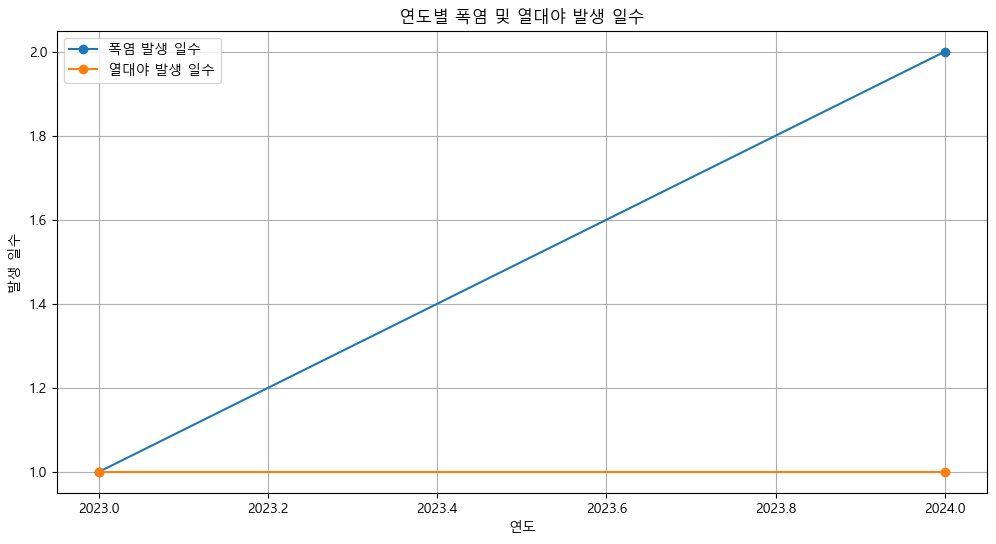

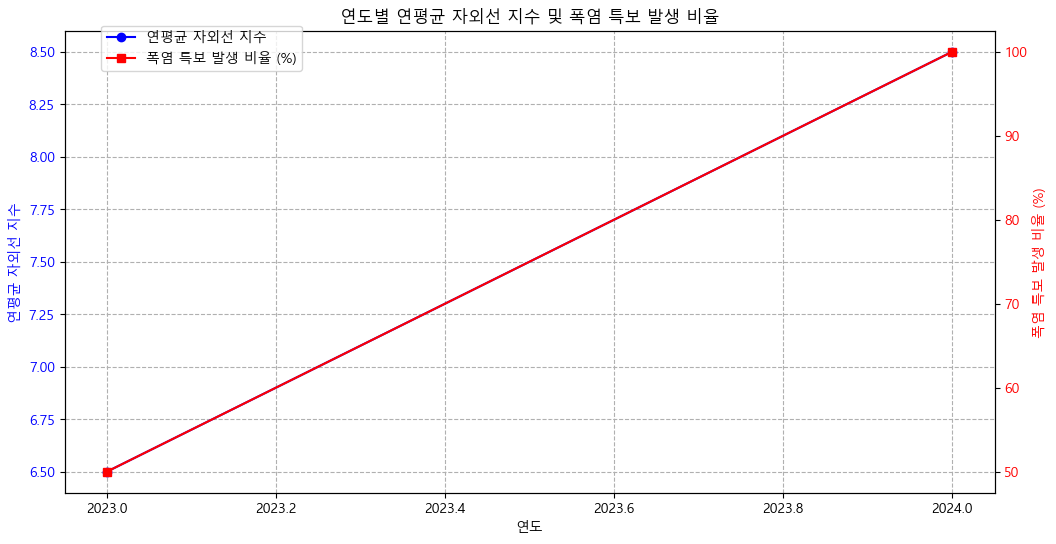

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 한글 폰트 설정 (Windows)
# Mac을 사용하는 경우 'Malgun Gothic'을 'AppleGothic'으로 변경
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 불러오기 및 전처리
try:
    df = pd.read_csv('폭염_데이터.csv', encoding='cp949')
except FileNotFoundError:
    print("오류: '폭염_데이터.csv' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    data = {'일시': ['2023-08-01', '2023-08-02', '2024-08-01', '2024-08-02'],
            '폭염여부(O/X)': ['O', 'X', 'O', 'O'],
            '열대야(O/X)': ['X', 'O', 'X', 'O'],
            '폭염특보(O/X)': ['O', 'X', 'O', 'O'],
            '자외선지수(단계)': [7, 6, 8, 9]}
    df = pd.DataFrame(data)

df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
df.dropna(subset=['일시'], inplace=True)
df['연도'] = df['일시'].dt.year

# 3. 폭염 및 열대야 발생 횟수 분석 및 시각화
heatwave_counts = df[df['폭염여부(O/X)'] == 'O'].groupby('연도').size()
tropical_night_counts = df[df['열대야(O/X)'] == 'O'].groupby('연도').size()

plt.figure(figsize=(12, 6))
plt.plot(heatwave_counts.index, heatwave_counts.values, marker='o', label='폭염 발생 일수')
plt.plot(tropical_night_counts.index, tropical_night_counts.values, marker='o', label='열대야 발생 일수')
plt.title('연도별 폭염 및 열대야 발생 일수')
plt.xlabel('연도')
plt.ylabel('발생 일수')
plt.grid(True)
plt.legend()
plt.show()

# 4. 폭염 특보 비율 및 자외선 지수 분석
df['폭염특보_숫자'] = df['폭염특보(O/X)'].apply(lambda x: 1 if x == 'O' else 0)
df['자외선지수(단계)'] = pd.to_numeric(df['자외선지수(단계)'], errors='coerce')
uv_index_avg = df.groupby('연도')['자외선지수(단계)'].mean()
heatwave_alert_ratio = df.groupby('연도')['폭염특보_숫자'].mean() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(uv_index_avg.index, uv_index_avg.values, marker='o', color='b', label='연평균 자외선 지수')
ax1.set_xlabel('연도')
ax1.set_ylabel('연평균 자외선 지수', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which='both', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(heatwave_alert_ratio.index, heatwave_alert_ratio.values, marker='s', color='r', label='폭염 특보 발생 비율 (%)')
ax2.set_ylabel('폭염 특보 발생 비율 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('연도별 연평균 자외선 지수 및 폭염 특보 발생 비율')
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.show()


### 연도별 폭염 및 열대야 발생 횟수
      폭염 발생 일수  열대야 발생 일수
연도                       
2021      2376        491

### 연도별 폭염 특보 및 자외선 지수 분석
      연평균 자외선 지수  폭염 특보 발생 비율 (%)
연도                               
2021         NaN        69.474313


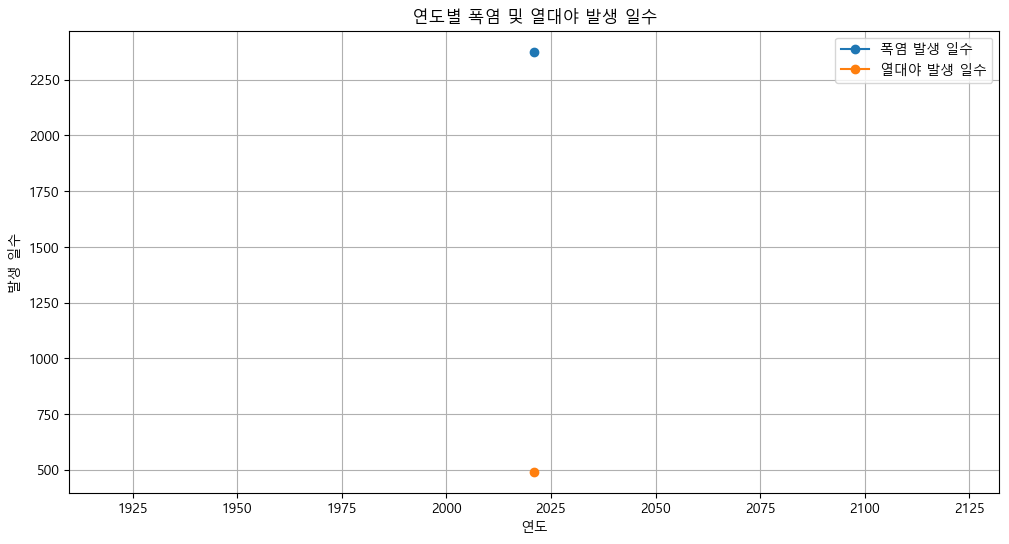

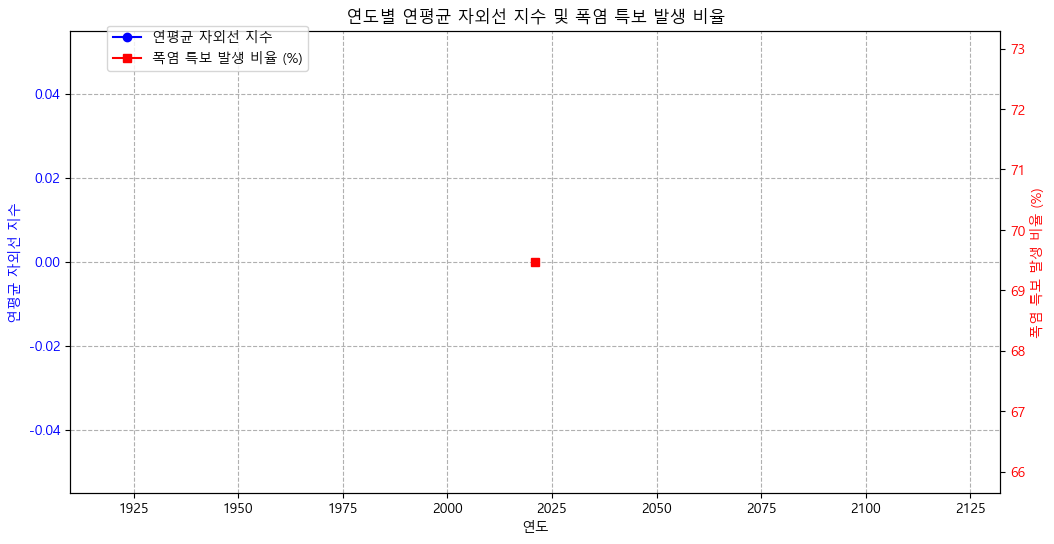

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows)
# Mac 사용자는 'Malgun Gothic'을 'AppleGothic'으로 변경
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
file_name = 'heatwave_2021_07.csv'
try:
    df = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"오류: '{file_name}' 파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
    # 예시 데이터프레임 생성 (파일 없을 시 대체)
    data = {'일시': ['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04'],
            '폭염여부(O/X)': ['O', 'X', 'O', 'O'],
            '열대야(O/X)': ['X', 'O', 'X', 'O'],
            '폭염특보(O/X)': ['O', 'X', 'O', 'O'],
            '자외선지수(단계)': [7, 6, 8, 9]}
    df = pd.DataFrame(data)

df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
df.dropna(subset=['일시'], inplace=True)
df['연도'] = df['일시'].dt.year

# 2. 폭염 및 열대야 발생 횟수 분석 (표로 출력)
heatwave_counts = df[df['폭염여부(O/X)'] == 'O'].groupby('연도').size().to_frame(name='폭염 발생 일수')
tropical_night_counts = df[df['열대야(O/X)'] == 'O'].groupby('연도').size().to_frame(name='열대야 발생 일수')

combined_counts = pd.concat([heatwave_counts, tropical_night_counts], axis=1)
print("### 연도별 폭염 및 열대야 발생 횟수")
print(combined_counts)


### 3. 폭염 특보 비율 및 자외선 지수 분석 (표로 출력)
df['폭염특보_숫자'] = df['폭염특보(O/X)'].apply(lambda x: 1 if x == 'O' else 0)
df['자외선지수(단계)'] = pd.to_numeric(df['자외선지수(단계)'], errors='coerce')

uv_index_avg = df.groupby('연도')['자외선지수(단계)'].mean().to_frame(name='연평균 자외선 지수')
heatwave_alert_ratio = (df.groupby('연도')['폭염특보_숫자'].mean() * 100).to_frame(name='폭염 특보 발생 비율 (%)')

combined_analysis = pd.concat([uv_index_avg, heatwave_alert_ratio], axis=1)
print("\n### 연도별 폭염 특보 및 자외선 지수 분석")
print(combined_analysis)


### 4. 시각화
# 폭염 및 열대야 발생 횟수 시각화
plt.figure(figsize=(12, 6))
plt.plot(combined_counts.index, combined_counts['폭염 발생 일수'], marker='o', label='폭염 발생 일수')
plt.plot(combined_counts.index, combined_counts['열대야 발생 일수'], marker='o', label='열대야 발생 일수')
plt.title('연도별 폭염 및 열대야 발생 일수')
plt.xlabel('연도')
plt.ylabel('발생 일수')
plt.grid(True)
plt.legend()
plt.show()

# 폭염 특보 비율 및 자외선 지수 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(combined_analysis.index, combined_analysis['연평균 자외선 지수'], marker='o', color='b', label='연평균 자외선 지수')
ax1.set_xlabel('연도')
ax1.set_ylabel('연평균 자외선 지수', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which='both', linestyle='--')

ax2 = ax1.twinx()
ax2.plot(combined_analysis.index, combined_analysis['폭염 특보 발생 비율 (%)'], marker='s', color='r', label='폭염 특보 발생 비율 (%)')
ax2.set_ylabel('폭염 특보 발생 비율 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('연도별 연평균 자외선 지수 및 폭염 특보 발생 비율')
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.9))
plt.show()